In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

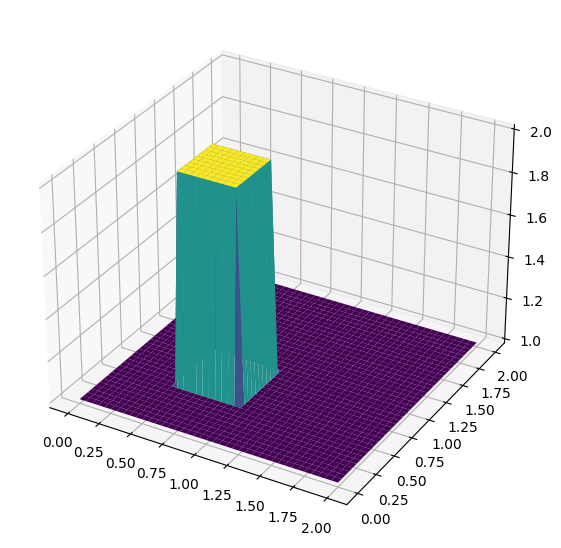

In [2]:
#Constant declaration
nx = 41
ny = 41
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nt = 240
c = 1
nu = .01
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((nx, ny))
v = np.ones((nx, ny))

#Initiallizing the array containing the shape of our initial conditions
u[nx//4:nx//2,nx//4:nx//2] = 2 

###Plot Initial Condition
##the figsize parameter can be used to produce different sized images
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

In [3]:
for n in range(nt + 1):  # loop over time steps
    un = u.copy() 
    vn = v.copy()
    for j in range(1, ny-1):
        for i in range(1, nx-1):
            u[i,j] = un[i,j] \
                     + nu * (dt/dx**2) * (un[i+1,j] - 2*un[i,j] + un[i-1,j]) \
                     + nu * (dt/dy**2) * (un[i,j+1] - 2*un[i,j] + un[i,j-1])
            u[i,j] -= (un[i,j] * dt/dx * (un[i,j] - un[i-1,j]) +
                       vn[i,j] * dt/dy * (un[i,j] - un[i,j-1]))
            
            v[i,j] = vn[i,j] \
                     + nu * (dt/dx**2) * (vn[i+1,j] - 2*vn[i,j] + vn[i-1,j]) \
                     + nu * (dt/dy**2) * (vn[i,j+1] - 2*vn[i,j] + vn[i,j-1])
            v[i,j] -= (un[i,j] * dt/dx * (vn[i,j] - vn[i-1,j]) +
                       vn[i,j] * dt/dy * (vn[i,j] - vn[i,j-1]))
          
    
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1
    
    
    # plot and save image
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)
    plt.savefig(f"images/image_{n:04d}.jpg")
    plt.close()
    
    